In [9]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [20]:
#load json audio files
import os
mypath="clothdata/"
(_, _, filenames) = next(os.walk(mypath))
from thinkdsp import read_json
wave = read_json(filepath=mypath+filenames[0])

### Extracting MFCCs

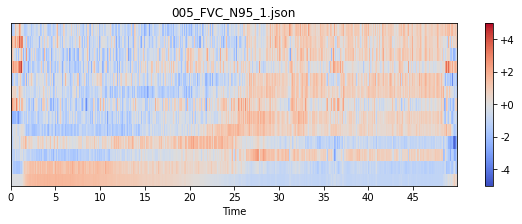

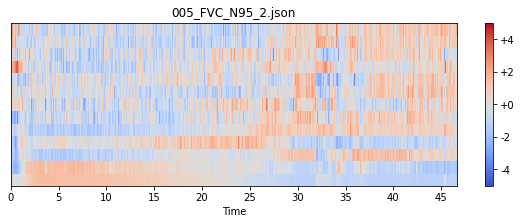

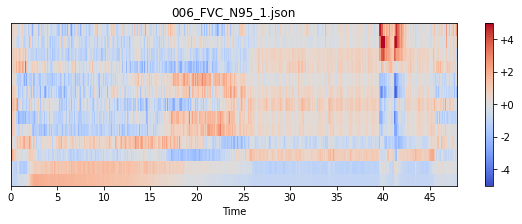

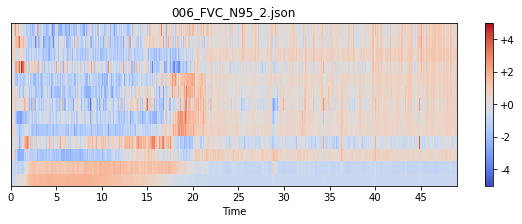

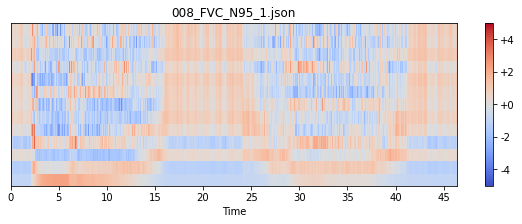

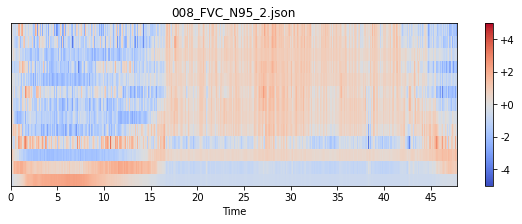

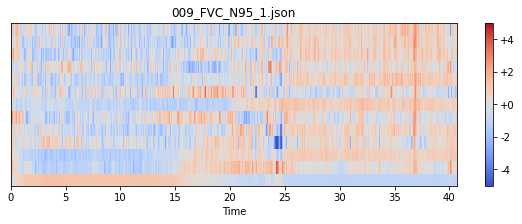

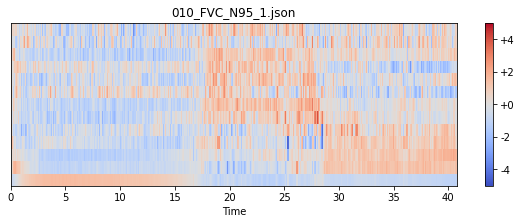

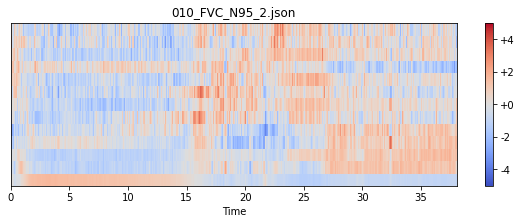

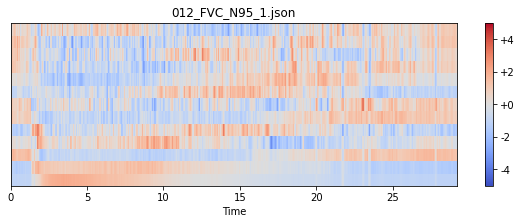

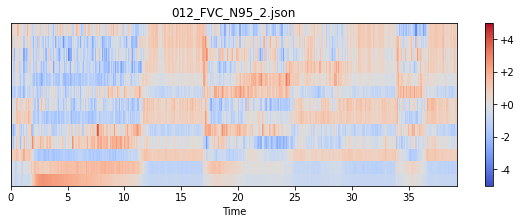

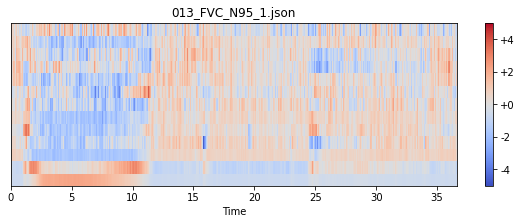

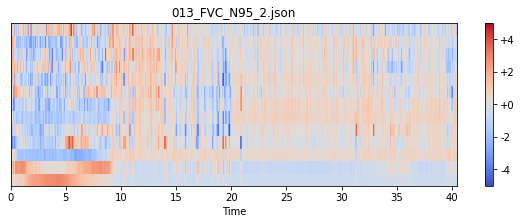

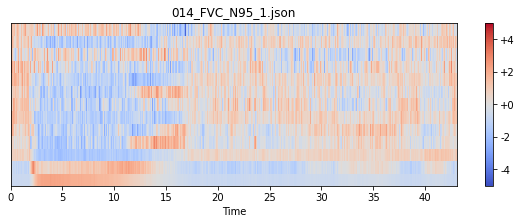

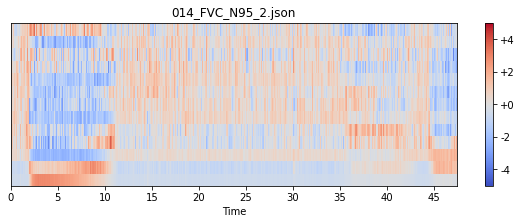

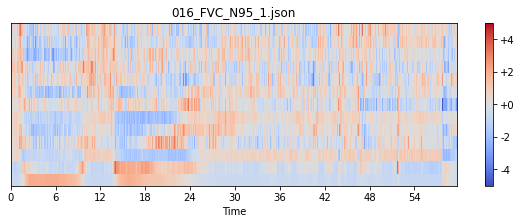

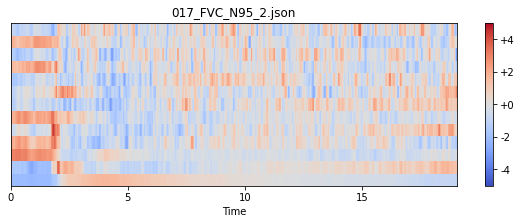

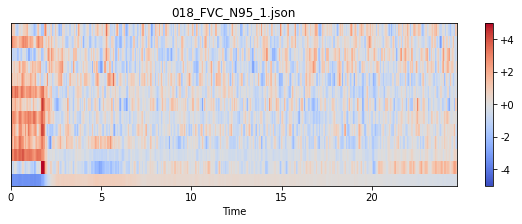

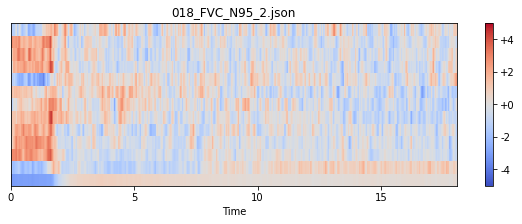

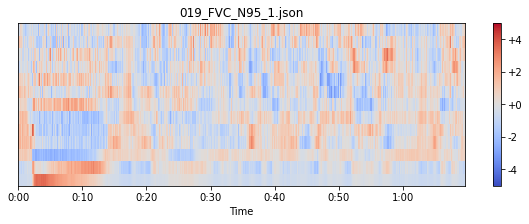

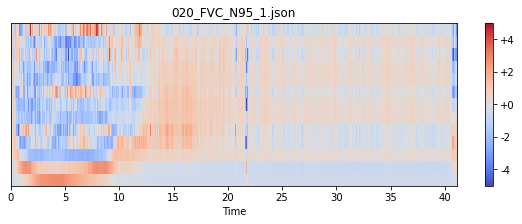

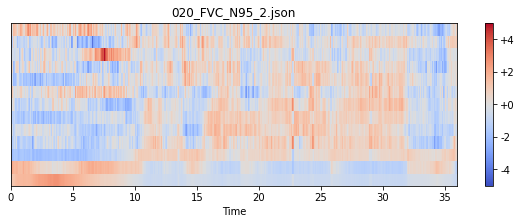

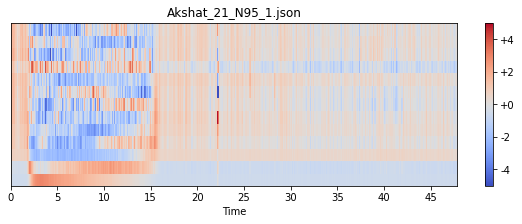

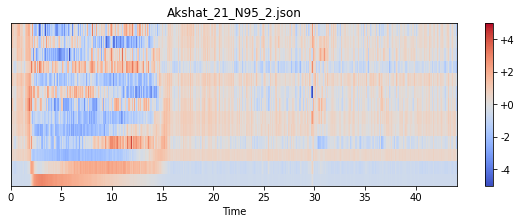

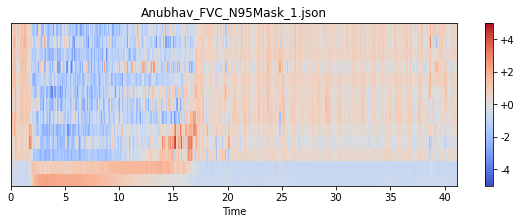

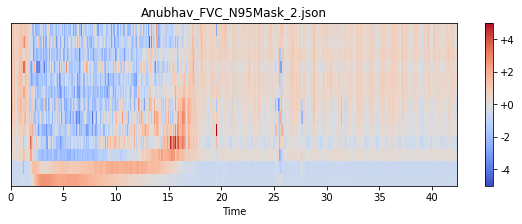

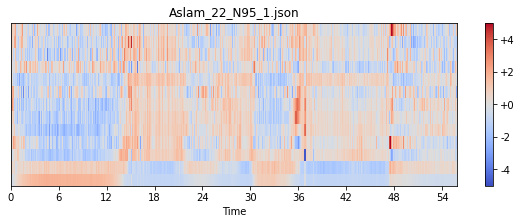

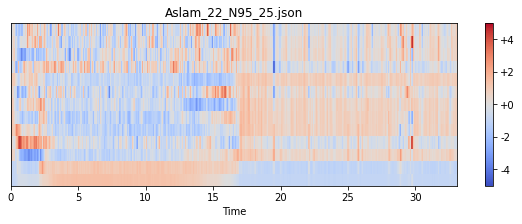

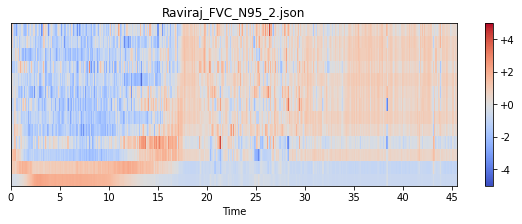

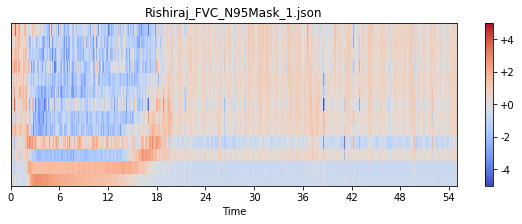

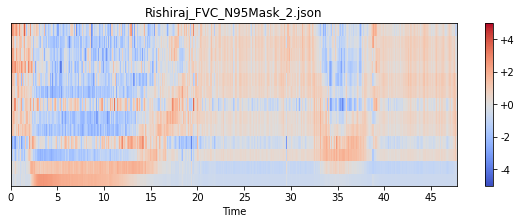

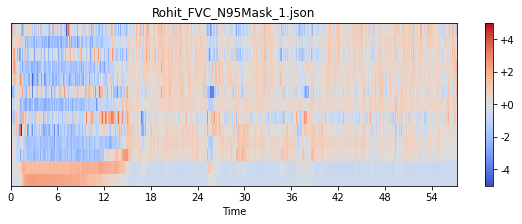

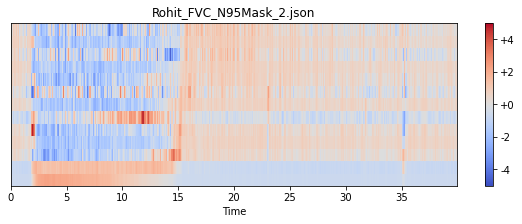

In [19]:
sr=16000
for file in filenames:  
    wave = read_json(filepath=mypath+file)
    mfccs = librosa.feature.mfcc(y=wave.ys, n_mfcc=13, sr=sr, hop_length=64, n_fft=512)
    mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
    #print(mfccs.shape)
    plt.figure(figsize=(10, 3))
    librosa.display.specshow(mfccs, x_axis="time", sr=sr)
    #plt.clim(-600,200) #without scaling
    plt.clim(-5,5) #with scaling
    plt.colorbar(format="%+2.f")
    plt.title(file)
    plt.show()

### For N95 Mask

In [14]:
#load json audio files
import os
mypath="n95data/"
(_, _, filenames) = next(os.walk(mypath))

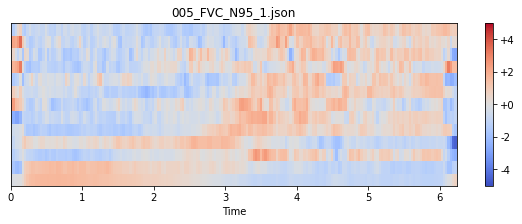

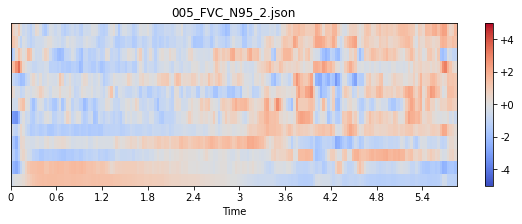

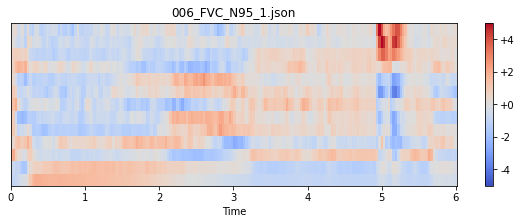

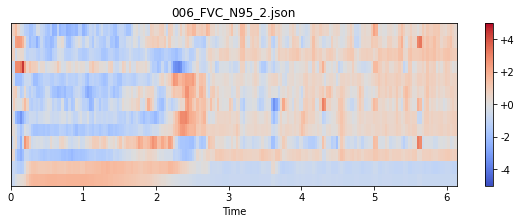

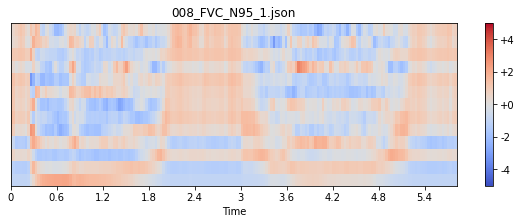

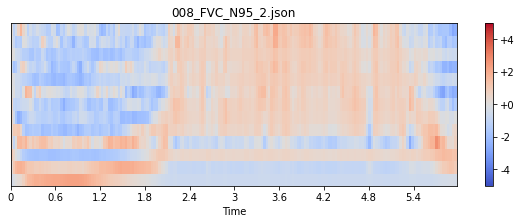

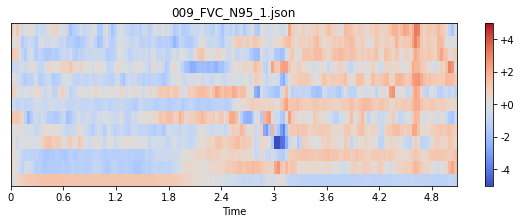

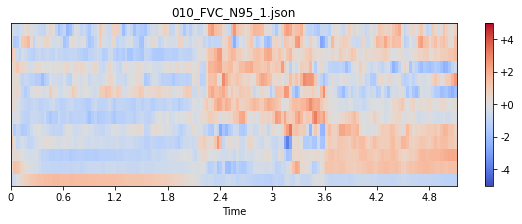

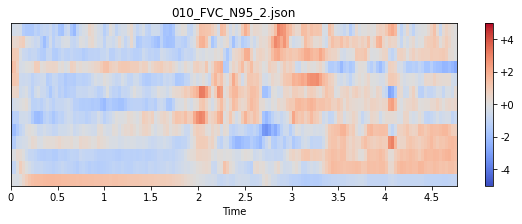

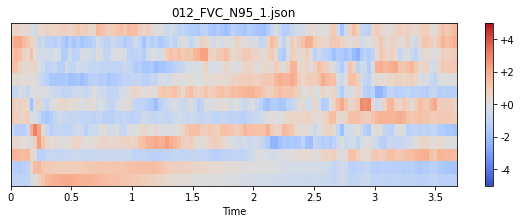

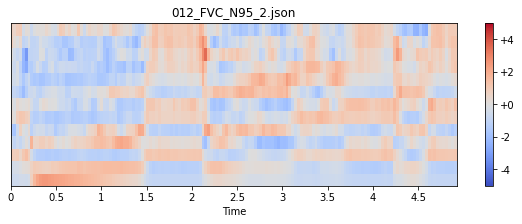

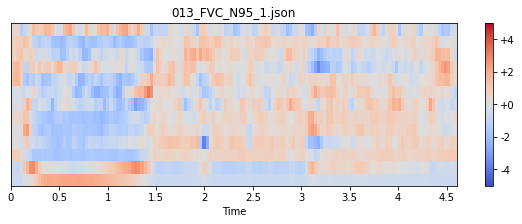

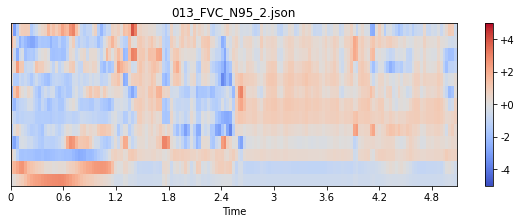

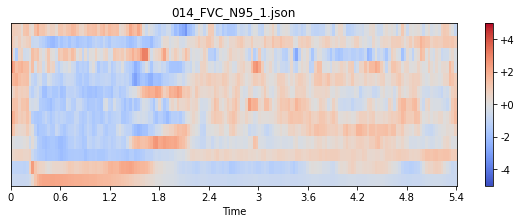

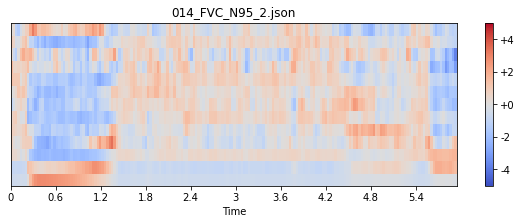

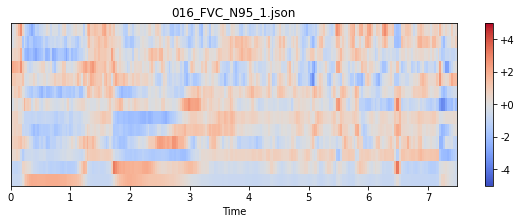

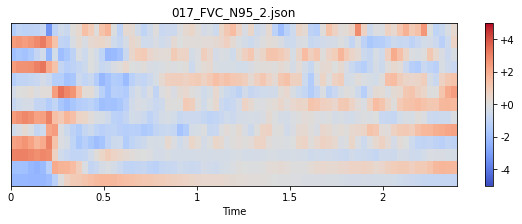

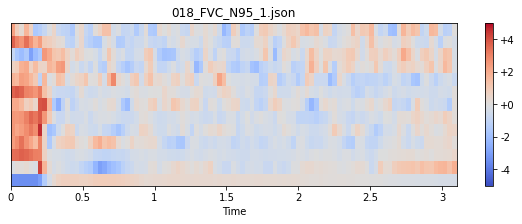

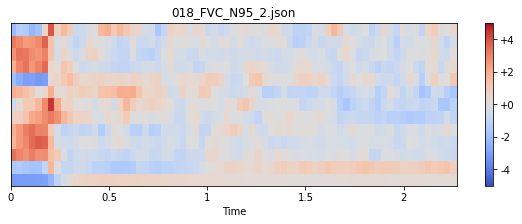

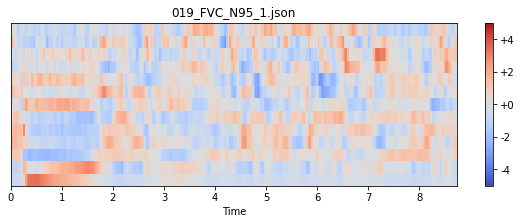

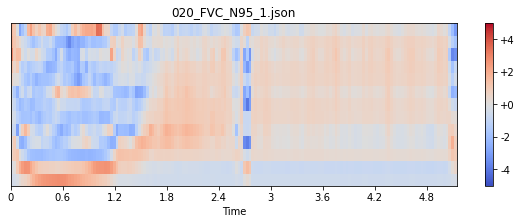

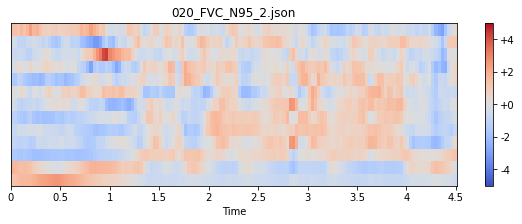

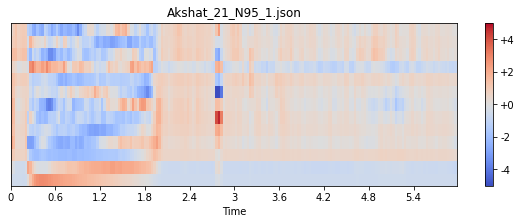

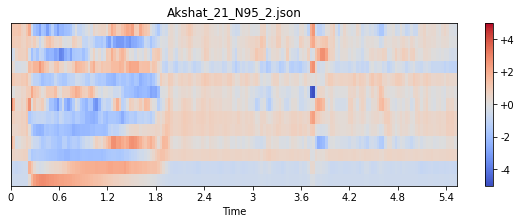

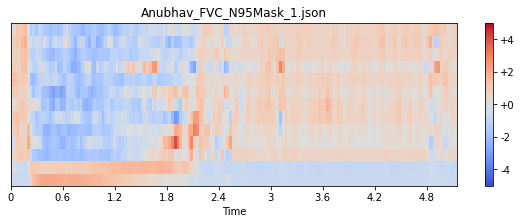

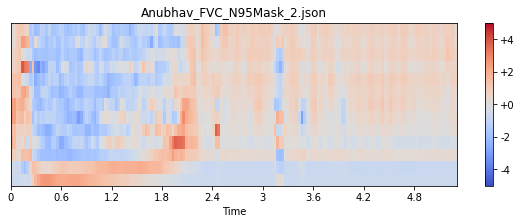

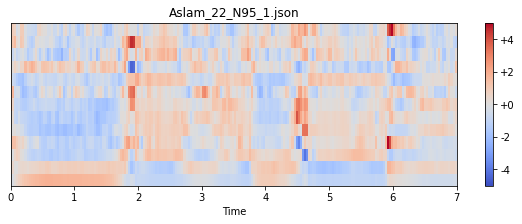

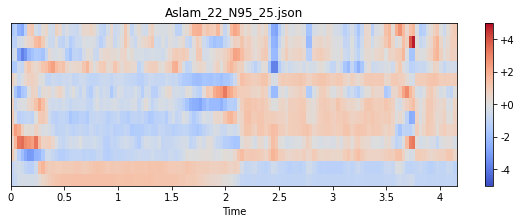

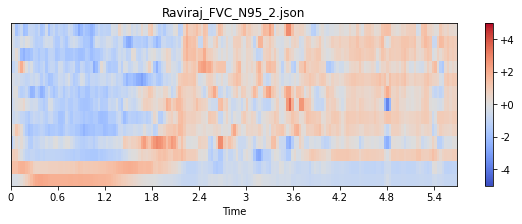

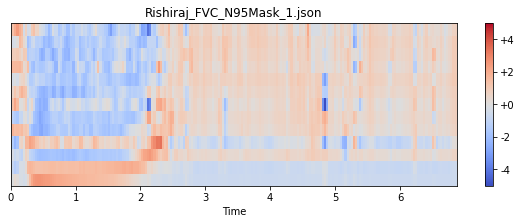

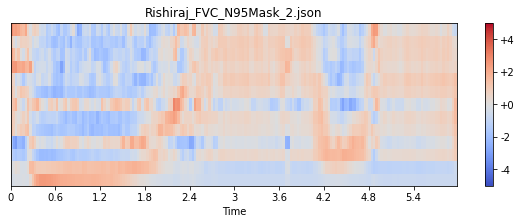

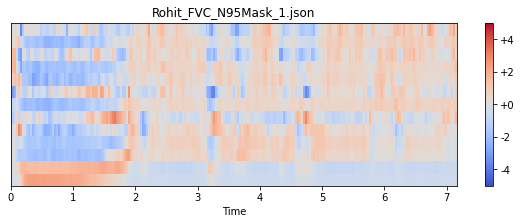

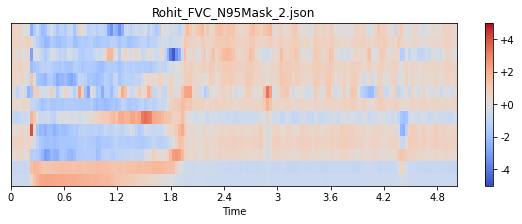

In [15]:
sr=16000
for file in filenames:  
    wave = read_json(filepath=mypath+file)
    mfccs = librosa.feature.mfcc(y=wave.ys, n_mfcc=13, sr=sr)
    mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
    #print(mfccs.shape)
    plt.figure(figsize=(10, 3))
    librosa.display.specshow(mfccs, x_axis="time", sr=sr)
    #plt.clim(-600,200) #without scaling
    plt.clim(-5,5) #with scaling
    plt.colorbar(format="%+2.f")
    plt.title(file)
    plt.show()

### Computing first / second MFCCs derivatives

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


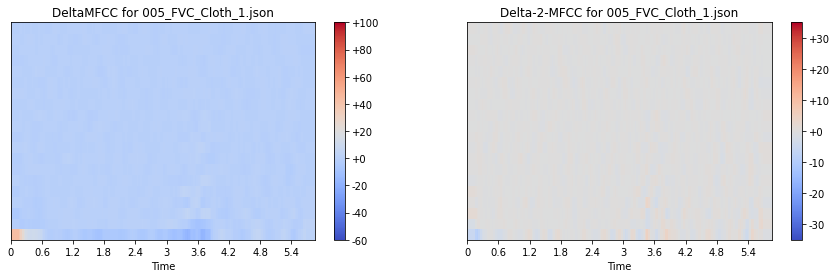

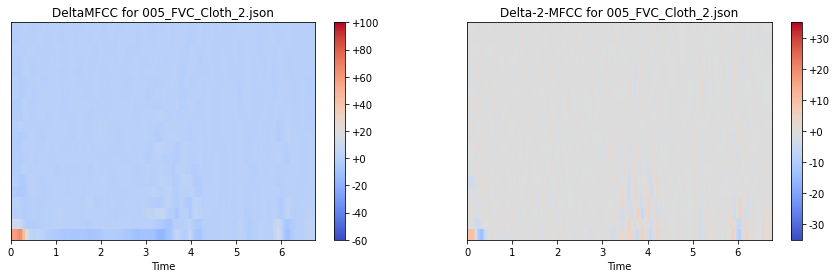

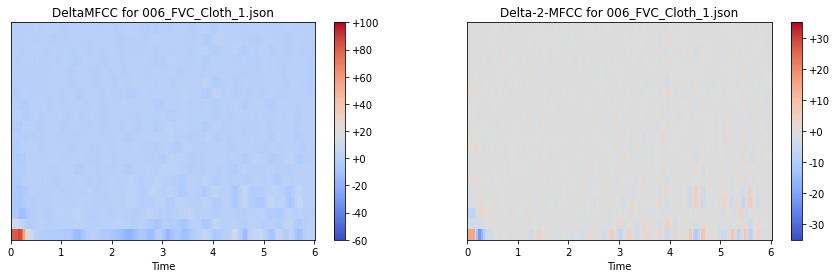

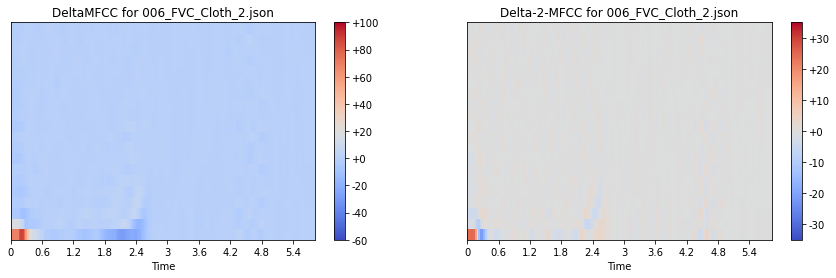

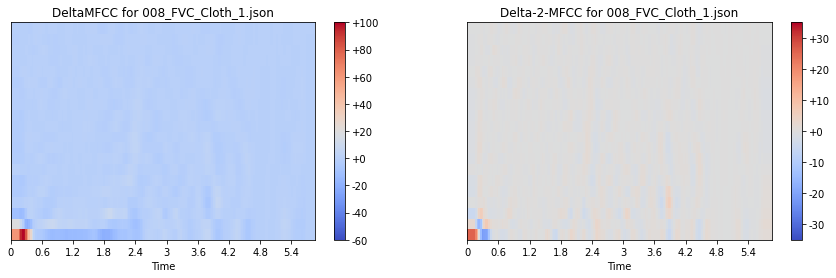

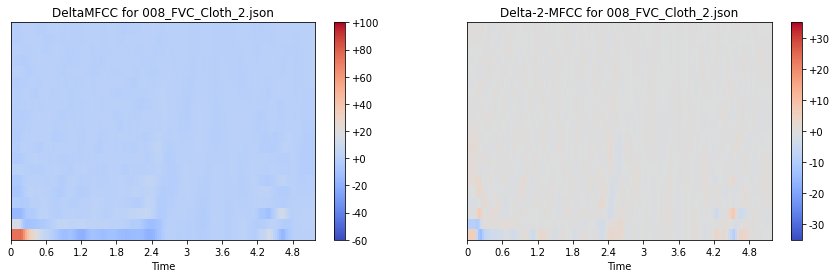

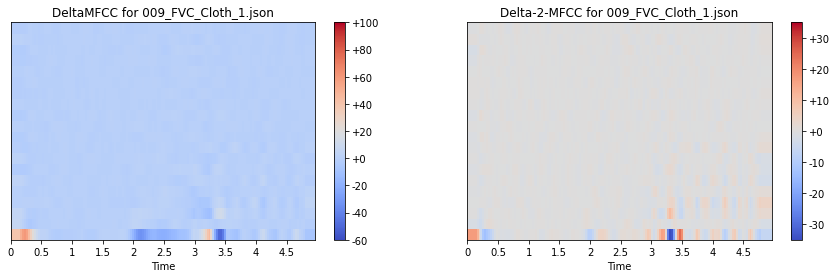

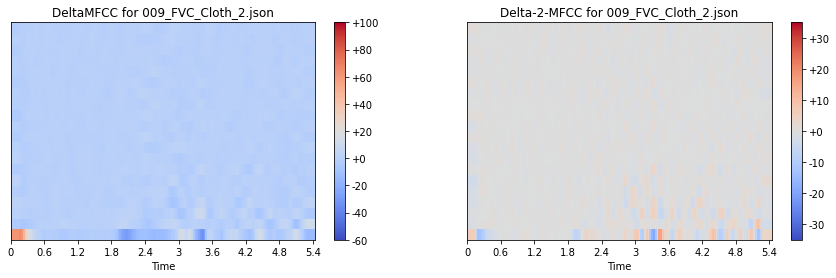

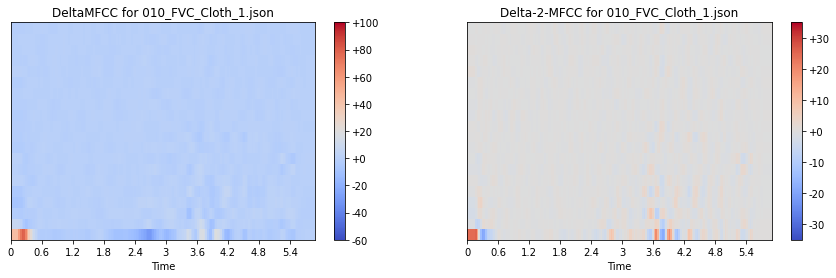

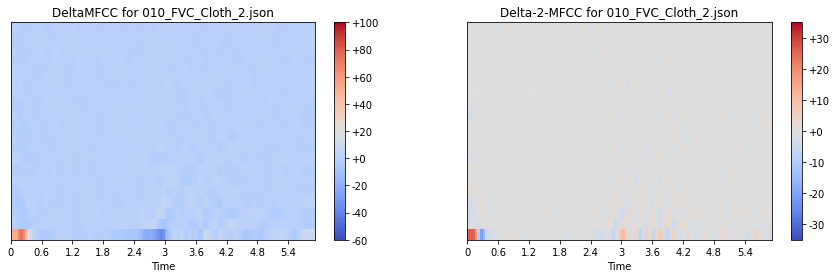

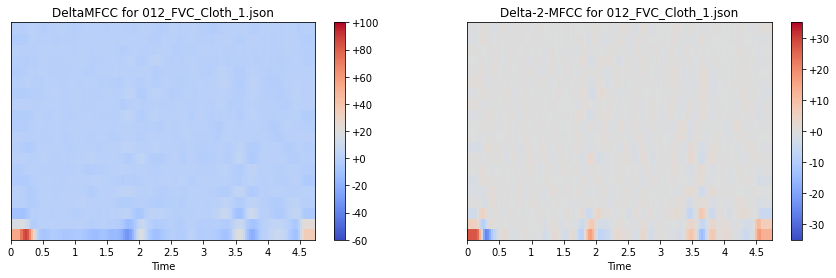

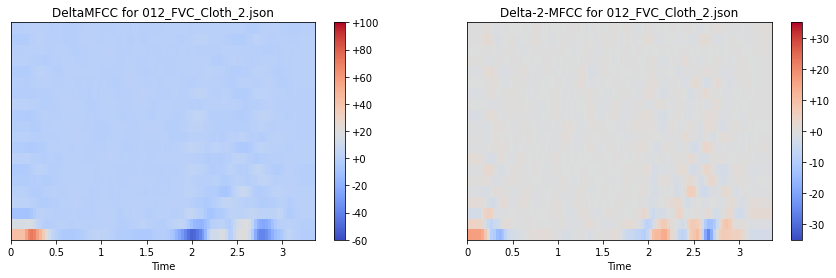

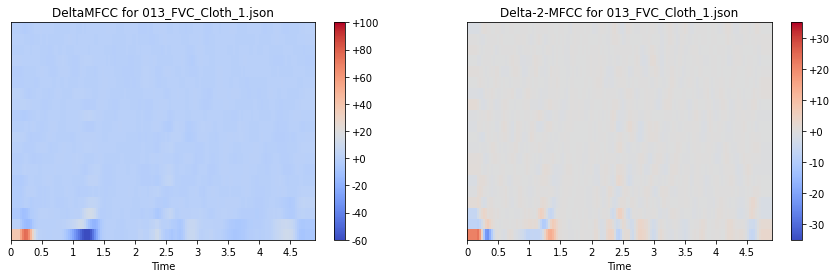

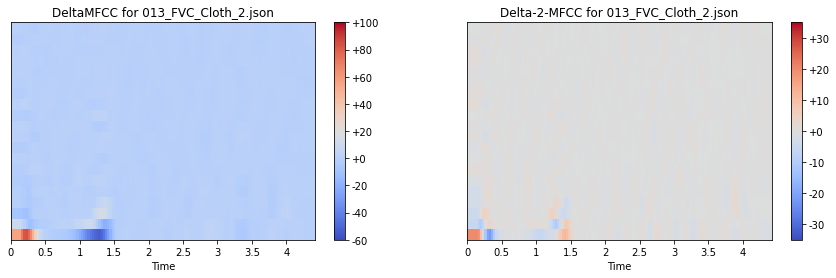

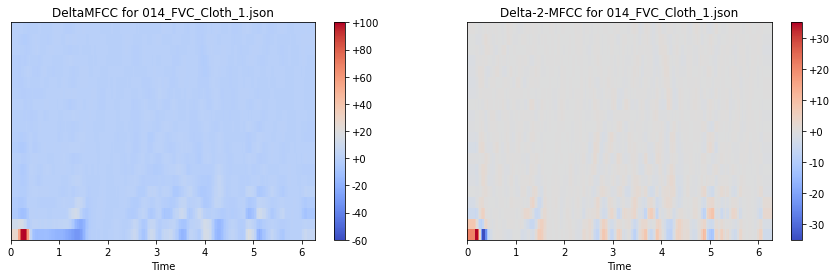

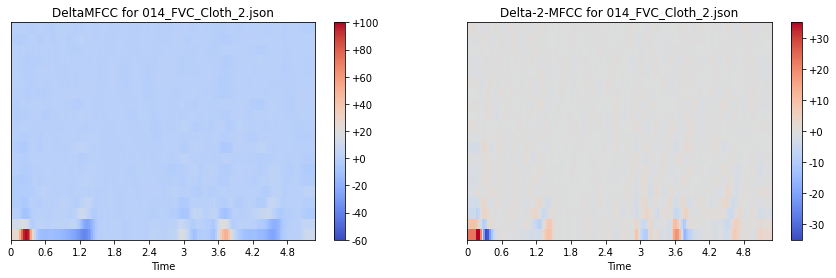

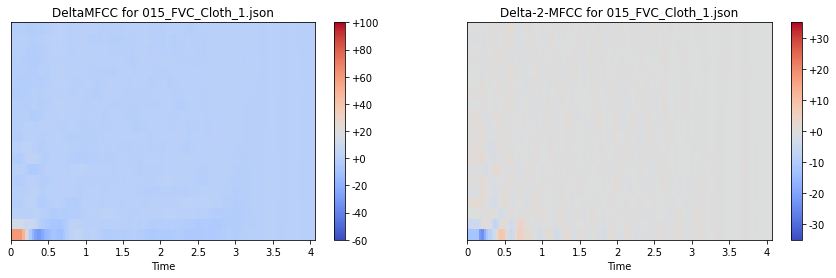

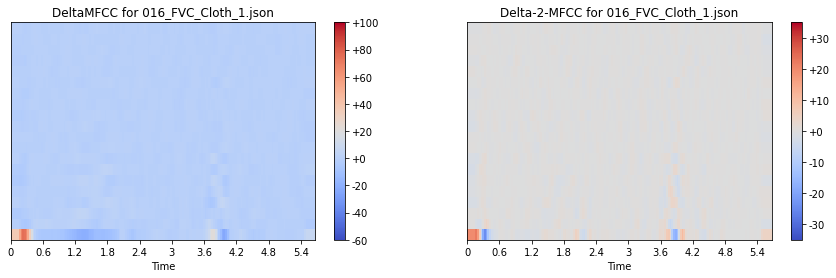

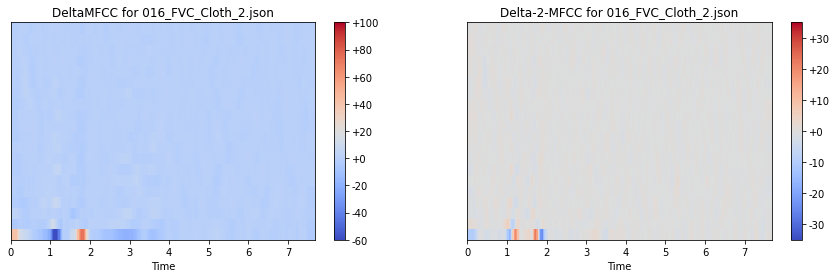

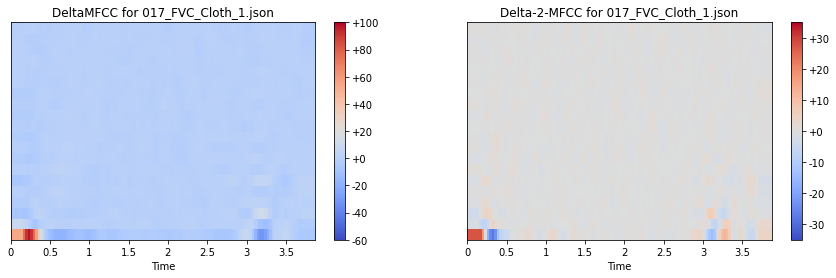

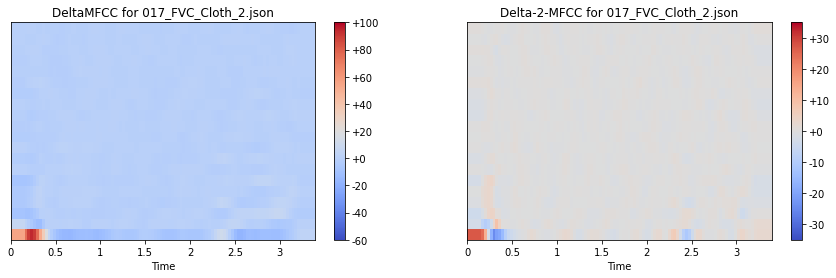

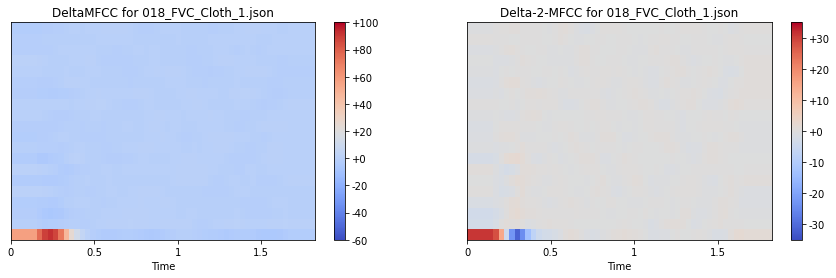

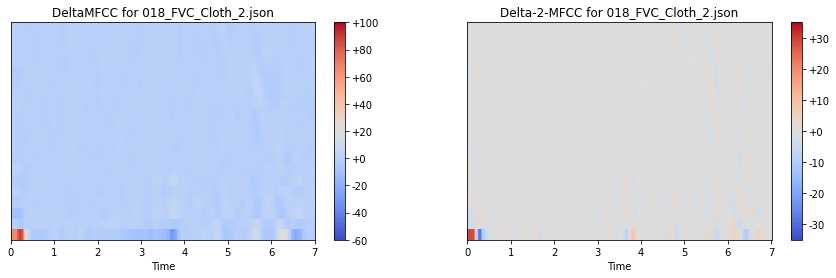

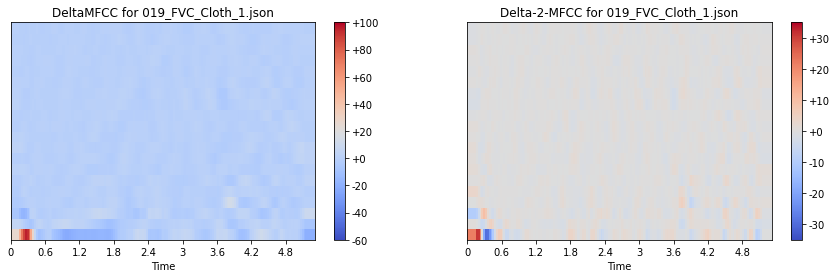

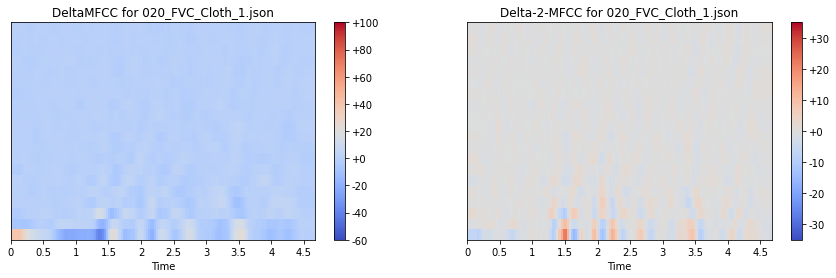

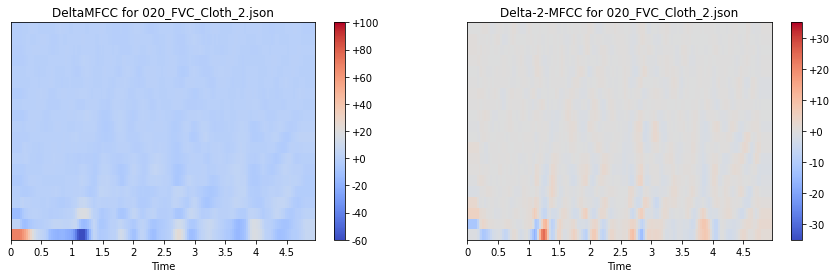

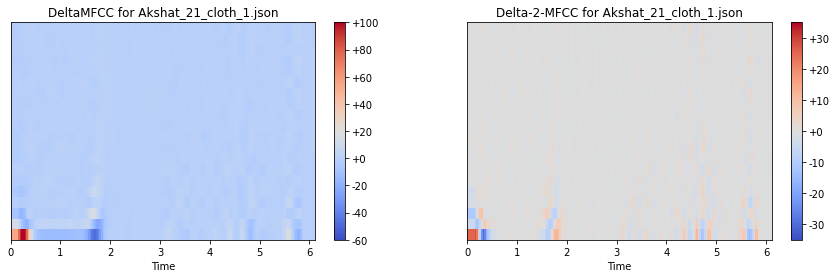

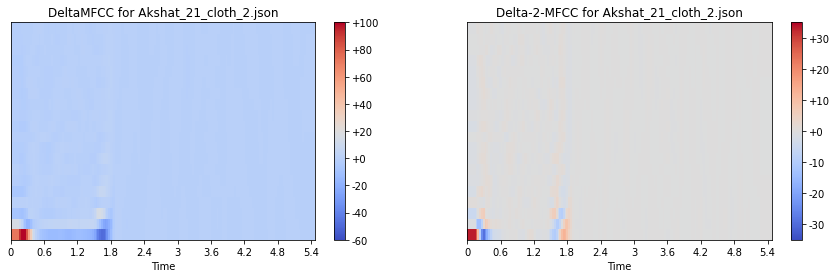

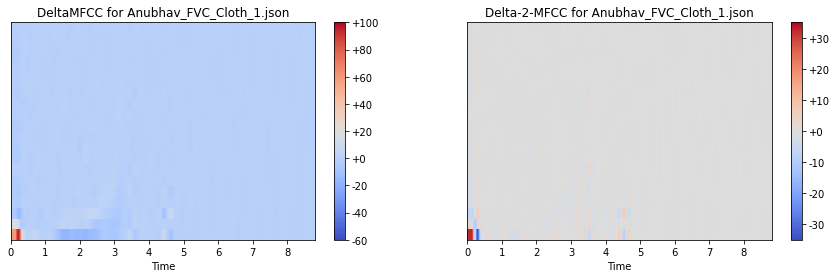

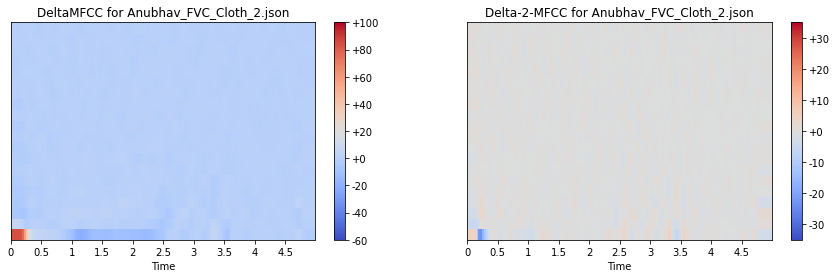

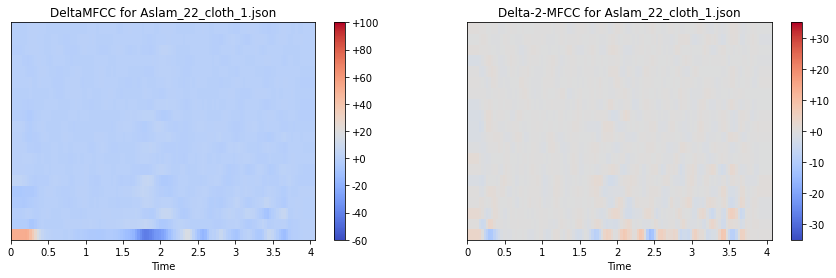

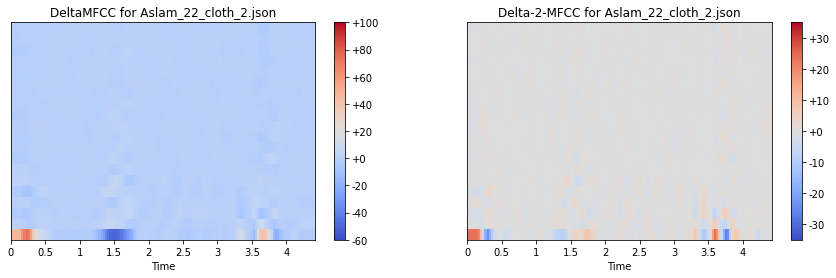

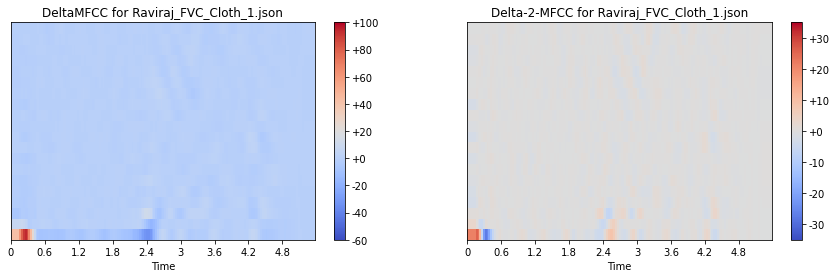

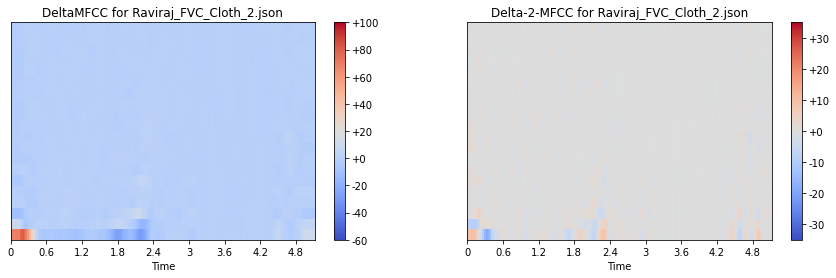

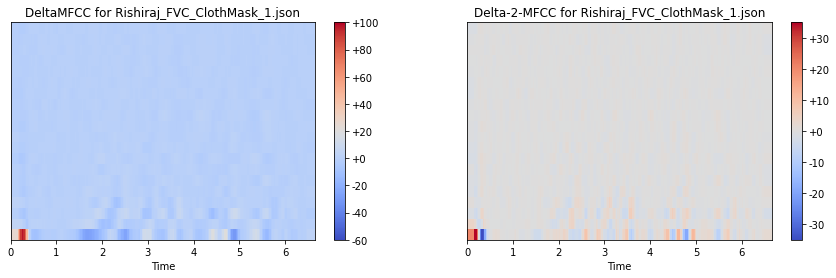

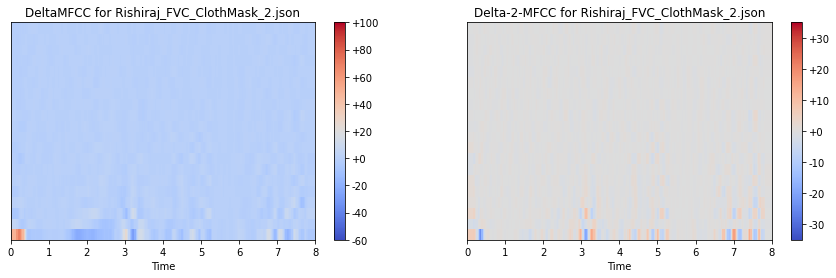

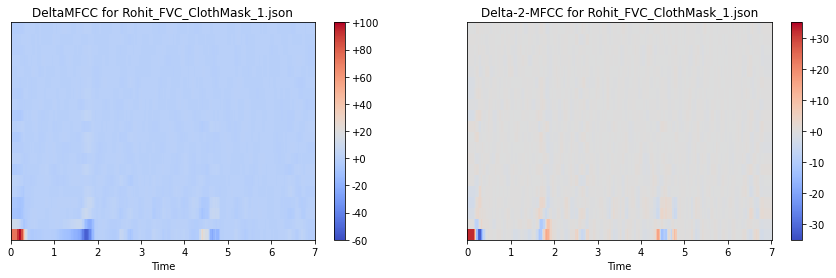

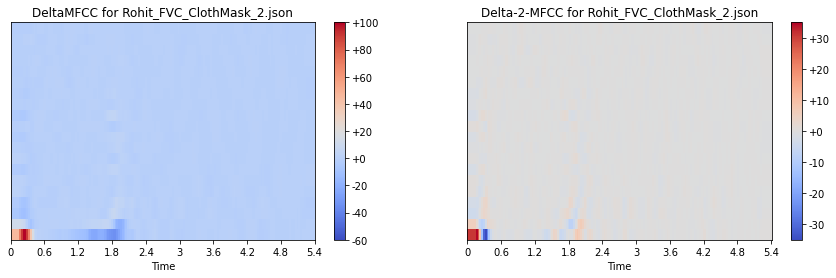

In [8]:
for file in filenames:  
    wave = read_json(filepath=mypath+file)
    mfccs = librosa.feature.mfcc(y=wave.ys, n_mfcc=20, sr=sr)
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    
    fig = plt.subplots(figsize=(15,4))
    plt.subplot(1,2,1)
    
    librosa.display.specshow(delta_mfccs, x_axis="time", sr=sr)
    plt.clim(-60, 100)
    plt.colorbar(format="%+2.f")
    plt.title("DeltaMFCC for "+file)
    #plt.show()
    
    plt.subplot(1,2,2)
    librosa.display.specshow(delta2_mfccs, x_axis="time", sr=sr)
    plt.clim(-35, 35)
    plt.colorbar(format="%+2.f")
    plt.title("Delta-2-MFCC for "+file)
    #plt.show()

### Concat Delta MFCC

In [16]:
mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

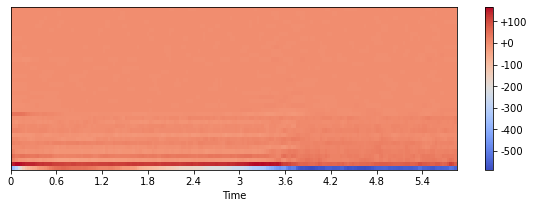

In [17]:
plt.figure(figsize=(10, 3))
librosa.display.specshow(mfccs_features, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()